In [ ]:
import torch
import itertools
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import os

In [ ]:
#train_data = os.listdir('/scratch/liy31/myjupyter/capstone/train_data_overlap/')
#train_label = os.listdir('/scratch/liy31/myjupyter/capstone/train_label_overlap/')
train_data = os.listdir('/scratch/liy31/myjupyter/capstone/train_data/')
train_label = os.listdir('/scratch/liy31/myjupyter/capstone/train_label/')

In [ ]:
selected_data = set(['_'.join(_.split('_')[:4]) for _ in train_data])

In [ ]:
np.unique([_[:13] for _ in selected_data], return_counts=True)

(array(['121919_Myo089', '121919_Myo208', '121919_Myo231', '121919_Myo253',
        '121919_Myo368', '121919_Myo388', '121919_Myo511'], dtype='<U13'),
 array([36, 27,  8, 33, 52, 23,  9]))

In [ ]:
selected_data = set(['_'.join(_.split('_')[:4]) for _ in train_data])

In [ ]:
np.unique([_[:13] for _ in selected_data], return_counts=True)

(array(['121919_Myo089', '121919_Myo208', '121919_Myo231', '121919_Myo253',
        '121919_Myo368', '121919_Myo388', '121919_Myo511'], dtype='<U13'),
 array([36, 27,  8, 33, 52, 23,  9]))

In [ ]:
# train data (121): 121919_Myo089, 121919_Myo253, 121919_Myo368
# validation data (50): 121919_Myo208, 121919_Myo388
# test data (17): 121919_Myo231, 121919_Myo511 

In [ ]:
train_list = [[(_ + '_data_' + str(idx) + '.npy', _ + '_target_' + str(idx) + '.npy') for idx in range(48)] 
              for _ in selected_data if _[:13] in ['121919_Myo089', '121919_Myo253', '121919_Myo368']]
validation_list = [[(_ + '_data_' + str(idx) + '.npy', _ + '_target_' + str(idx) + '.npy') for idx in range(48)] 
                   for _ in selected_data if _[:13] in ['121919_Myo208', '121919_Myo388']]
test_list = [[(_ + '_data_' + str(idx) + '.npy', _ + '_target_' + str(idx) + '.npy') for idx in range(48)] 
             for _ in selected_data if _[:13] in ['121919_Myo231', '121919_Myo511']]
train_list = list(itertools.chain(*train_list))
validation_list = list(itertools.chain(*validation_list))
test_list = list(itertools.chain(*test_list))
print('train data: {}'.format(len(train_list)))
print('validation data: {}'.format(len(validation_list)))
print('test data: {}'.format(len(test_list)))

train data: 5808
validation data: 2400
test data: 816


In [ ]:
train_list = [[(_ + '_data_' + str(idx) + '.npy', _ + '_target_' + str(idx) + '.npy') for idx in range(2944)] 
              for _ in selected_data if _[:13] in ['121919_Myo089', '121919_Myo253', '121919_Myo368']]
validation_list = [[(_ + '_data_' + str(idx) + '.npy', _ + '_target_' + str(idx) + '.npy') for idx in range(2944)] 
                   for _ in selected_data if _[:13] in ['121919_Myo208', '121919_Myo388']]
test_list = [[(_ + '_data_' + str(idx) + '.npy', _ + '_target_' + str(idx) + '.npy') for idx in range(2944)] 
             for _ in selected_data if _[:13] in ['121919_Myo231', '121919_Myo511']]
train_list = list(itertools.chain(*train_list))
validation_list = list(itertools.chain(*validation_list))
test_list = list(itertools.chain(*test_list))
print('train data: {}'.format(len(train_list)))
print('validation data: {}'.format(len(validation_list)))
print('test data: {}'.format(len(test_list)))

train data: 356224
validation data: 147200
test data: 50048


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):

        input = np.load('/scratch/liy31/myjupyter/capstone/train_data/' + self.file_list[idx][0])
        target = np.load('/scratch/liy31/myjupyter/capstone/train_label/' + self.file_list[idx][1])
        input = torch.from_numpy(input).unsqueeze(0)
        target = torch.from_numpy(target).unsqueeze(0)

        if self.transform:
            input = self.transform(input)

        return (input, target)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):

        input = np.load('/scratch/liy31/myjupyter/capstone/train_data_overlap/' + self.file_list[idx][0])
        target = np.load('/scratch/liy31/myjupyter/capstone/train_label_overlap/' + self.file_list[idx][1])
        input = torch.from_numpy(input).unsqueeze(0)
        target = torch.from_numpy(target).unsqueeze(0)

        if self.transform:
            input = self.transform(input)

        return (input, target)

In [ ]:
dataloader = {}
dataloader['train'] = DataLoader(CustomDataset(train_list), batch_size=16, shuffle=True, num_workers=8, drop_last=False)
dataloader['validation'] = DataLoader(CustomDataset(validation_list), batch_size=16, shuffle=True, num_workers=8, drop_last=False)
dataloader['test'] = DataLoader(CustomDataset(test_list), batch_size=16, shuffle=True, num_workers=8, drop_last=False)

In [ ]:
datasize = {'train': len(train_list), 'validation': len(validation_list), 'test': len(test_list)}

In [ ]:
datasize

{'train': 5808, 'validation': 2400, 'test': 816}

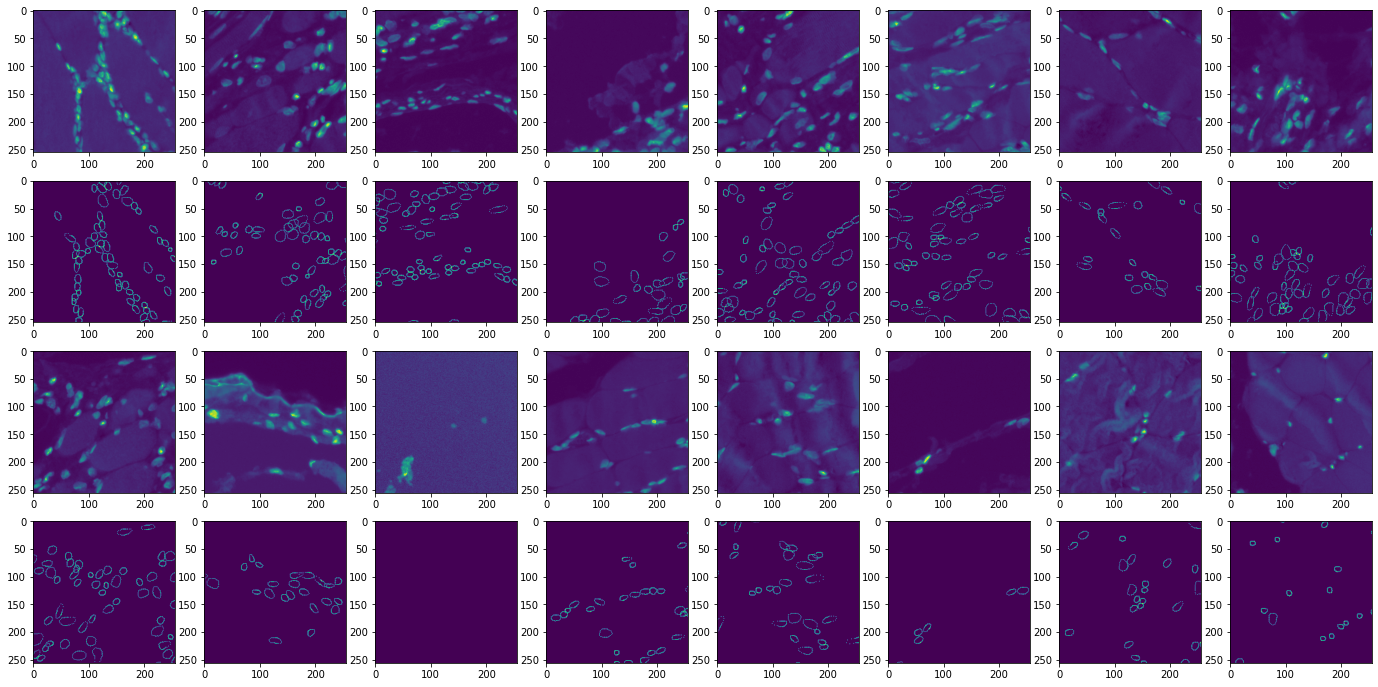

In [ ]:
input, target = next(iter(dataloader['train']))
plt.figure(figsize=(24,12))
for _ in range(8):
    plt.subplot(4,8,_+1)
    plt.imshow(input[_].squeeze().numpy())
    plt.subplot(4,8,_+9)
    plt.imshow(target[_].squeeze().numpy())
for _ in range(8,16):
    plt.subplot(4,8,_+9)
    plt.imshow(input[_].squeeze().numpy())
    plt.subplot(4,8,_+17)
    plt.imshow(target[_].squeeze().numpy())
plt.show()

# DiceLoss

In [ ]:
def train_model(model, criterion, optimizer, scheduler, thres=0.8, num_epochs=25):
    since = time.time()
    
    init_model_wts = copy.deepcopy(model.state_dict())
    best_pos_model_wts = copy.deepcopy(model.state_dict())
    best_neg_model_wts = copy.deepcopy(model.state_dict())
    best_model_wts = copy.deepcopy(model.state_dict())
    best_pos_acc = 0.0
    best_neg_acc = 0.0
    best_acc = 0.0

    for epoch in tqdm(range(num_epochs)):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_pos_corrects = 0
            running_neg_corrects = 0
            running_pos = 0
            running_neg = 0

            # Iterate over data.
            for inputs, target in dataloader[phase]:
                inputs = inputs.to(device)
                target = target.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    pred = (outputs > thres) * 1
                    loss = criterion(outputs, target)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item()
                running_pos += torch.sum(target)
                running_neg += torch.sum(~target.bool())
                running_pos_corrects += torch.sum(pred[target.bool()])
                running_neg_corrects += torch.sum(~target.bool()) - torch.sum(pred[~target.bool()])
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / datasize[phase]
            epoch_pos_acc = running_pos_corrects.double() / running_pos.double()
            epoch_neg_acc = running_neg_corrects.double() / running_neg.double()
            epoch_acc = (epoch_pos_acc + epoch_neg_acc) / 2

            print('{} Loss: {:.4f} Boundary Acc: {:.4f} Background Acc: {:.4f} Overall Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_pos_acc, epoch_neg_acc, epoch_acc))

            # deep copy the model
            if phase == 'validation':
                if epoch_pos_acc > best_pos_acc:
                    best_pos_acc = epoch_pos_acc
                    best_pos_model_wts = copy.deepcopy(model.state_dict())
                    torch.save({'model': model, 'optimizer': optimizer, 'scheduler': scheduler.state_dict(), 'loss': criterion.state_dict(), 
                                'thres': thres, 'epoch': epoch, 'initial_state': init_model_wts}, 
                               '/scratch/liy31/myjupyter/capstone/model_tversky/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(epoch_pos_acc, epoch_neg_acc))
                if epoch_neg_acc > best_neg_acc:
                    best_neg_acc = epoch_neg_acc
                    best_neg_model_wts = copy.deepcopy(model.state_dict())
                    torch.save({'model': model, 'optimizer': optimizer, 'scheduler': scheduler.state_dict(), 'loss': criterion.state_dict(), 
                                'thres': thres, 'epoch': epoch, 'initial_state': init_model_wts}, 
                               '/scratch/liy31/myjupyter/capstone/model_tversky/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(epoch_pos_acc, epoch_neg_acc))
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    torch.save({'model': model, 'optimizer': optimizer, 'scheduler': scheduler.state_dict(), 'loss': criterion.state_dict(), 
                                'thres': thres, 'epoch': epoch, 'initial_state': init_model_wts}, 
                               '/scratch/liy31/myjupyter/capstone/model_tversky/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(epoch_pos_acc, epoch_neg_acc))

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best Boundary Acc: {:4f}, Best Background Acc: {:4f}, Best Overall Acc: {:4f}'.format(best_pos_acc, best_neg_acc, best_acc))

In [ ]:
class DiceLoss(nn.Module):
    # reduction = 'sum'
    def __init__(self, device):
        super(DiceLoss, self).__init__()
        self.smooth = 1.0
        self.one = torch.ones(1, requires_grad=True, device=device)

    def forward(self, y_pred, y_true):
        assert y_pred.size() == y_true.size()
        y_pred = y_pred[:, 0].contiguous().view(-1)
        y_true = y_true[:, 0].contiguous().view(-1)
        intersection = (y_pred * y_true).sum()
        dsc = (2. * intersection + self.smooth) / (
            y_pred.sum() + y_true.sum() + self.smooth
        )
        return self.one - dsc

In [ ]:

class tversky(nn.Module):
    def __init__(self,device):
        super(tversky, self).__init__()
        self.alpha = 0.7
        self.smooth = 1.0
        self.one = torch.ones(1, requires_grad=True, device=device)
        
    def forward(self, y_pred, y_true):
        assert y_pred.size() == y_true.size()
        y_true_pos = y_pred[:, 0].contiguous().view(-1)
        y_pred_pos = y_true[:, 0].contiguous().view(-1)
        true_pos = (y_true_pos * y_pred_pos).sum()
        false_neg = (y_true_pos * (1 - y_pred_pos)).sum()
        false_pos = ((1 - y_true_pos) * y_pred_pos).sum()
        tv = (true_pos + self.smooth) / (true_pos + self.alpha * false_neg + (1 - self.alpha) * false_pos + self.smooth)
        return self.one - tv



In [ ]:
class focal_tversky(nn.Module):
    def __init__(self,device):
        super(focal_tversky, self).__init__()
        self.alpha = 0.7
        self.smooth = 1.0
        self.gamma = 0.75
        self.one = torch.ones(1, requires_grad=True, device=device)
        
    def forward(self, y_pred, y_true):
        assert y_pred.size() == y_true.size()
        y_true_pos = y_pred[:, 0].contiguous().view(-1)
        y_pred_pos = y_true[:, 0].contiguous().view(-1)
        true_pos = (y_true_pos * y_pred_pos).sum()
        false_neg = (y_true_pos * (1 - y_pred_pos)).sum()
        false_pos = ((1 - y_true_pos) * y_pred_pos).sum()
        tv = (true_pos + self.smooth) / (true_pos + self.alpha * false_neg + (1 - self.alpha) * false_pos + self.smooth)
        return torch.pow((self.one - tv), self.gamma)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=1, out_channels=1, init_features=32, pretrained=False) # https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/
model = model.to(device)
#criterion = DiceLoss(device)
#criterion = nn.CrossEntropyLoss()
criterion = tversky(device)
#criterion = focal_tversky(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

Using cache found in /home/liy31/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [ ]:
from tqdm import tqdm
train_model(model, criterion, optimizer, scheduler)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 0/24
----------


In [ ]:
from tqdm import tqdm
train_model(model, criterion, optimizer, scheduler)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 0/24
----------
train Loss: 0.0429 Boundary Acc: 0.3983 Background Acc: 0.9869 Overall Acc: 0.6926
validation Loss: 0.0463 Boundary Acc: 0.2892 Background Acc: 0.9936 Overall Acc: 0.6414


  4%|▍         | 1/25 [01:23<33:20, 83.33s/it]


Epoch 1/24
----------
train Loss: 0.0378 Boundary Acc: 0.4075 Background Acc: 0.9944 Overall Acc: 0.7010
validation Loss: 0.0400 Boundary Acc: 0.3988 Background Acc: 0.9937 Overall Acc: 0.6963


  8%|▊         | 2/25 [02:48<32:08, 83.83s/it]


Epoch 2/24
----------
train Loss: 0.0365 Boundary Acc: 0.4245 Background Acc: 0.9948 Overall Acc: 0.7097
validation Loss: 0.0411 Boundary Acc: 0.3136 Background Acc: 0.9956 Overall Acc: 0.6546


 12%|█▏        | 3/25 [04:13<30:50, 84.11s/it]


Epoch 3/24
----------
train Loss: 0.0357 Boundary Acc: 0.4333 Background Acc: 0.9951 Overall Acc: 0.7142


 16%|█▌        | 4/25 [05:37<29:31, 84.34s/it]

validation Loss: 0.0381 Boundary Acc: 0.3818 Background Acc: 0.9955 Overall Acc: 0.6887

Epoch 4/24
----------
train Loss: 0.0350 Boundary Acc: 0.4426 Background Acc: 0.9953 Overall Acc: 0.7189
validation Loss: 0.0409 Boundary Acc: 0.2916 Background Acc: 0.9964 Overall Acc: 0.6440


 20%|██        | 5/25 [07:03<28:12, 84.62s/it]


Epoch 5/24
----------
train Loss: 0.0338 Boundary Acc: 0.4520 Background Acc: 0.9957 Overall Acc: 0.7239


 24%|██▍       | 6/25 [08:27<26:44, 84.44s/it]

validation Loss: 0.0369 Boundary Acc: 0.3829 Background Acc: 0.9961 Overall Acc: 0.6895

Epoch 6/24
----------
train Loss: 0.0335 Boundary Acc: 0.4543 Background Acc: 0.9958 Overall Acc: 0.7251


 28%|██▊       | 7/25 [10:09<26:57, 89.84s/it]

validation Loss: 0.0367 Boundary Acc: 0.3836 Background Acc: 0.9962 Overall Acc: 0.6899

Epoch 7/24
----------
train Loss: 0.0334 Boundary Acc: 0.4573 Background Acc: 0.9958 Overall Acc: 0.7266


 32%|███▏      | 8/25 [12:17<28:39, 101.13s/it]

validation Loss: 0.0362 Boundary Acc: 0.3935 Background Acc: 0.9962 Overall Acc: 0.6948

Epoch 8/24
----------
train Loss: 0.0333 Boundary Acc: 0.4592 Background Acc: 0.9958 Overall Acc: 0.7275
validation Loss: 0.0364 Boundary Acc: 0.3726 Background Acc: 0.9966 Overall Acc: 0.6846


 36%|███▌      | 9/25 [14:16<28:24, 106.50s/it]


Epoch 9/24
----------
train Loss: 0.0332 Boundary Acc: 0.4614 Background Acc: 0.9959 Overall Acc: 0.7287
validation Loss: 0.0364 Boundary Acc: 0.4116 Background Acc: 0.9957 Overall Acc: 0.7037


 40%|████      | 10/25 [16:18<27:47, 111.16s/it]


Epoch 10/24
----------
train Loss: 0.0329 Boundary Acc: 0.4645 Background Acc: 0.9959 Overall Acc: 0.7302


 44%|████▍     | 11/25 [18:13<26:14, 112.50s/it]

validation Loss: 0.0361 Boundary Acc: 0.3862 Background Acc: 0.9964 Overall Acc: 0.6913

Epoch 11/24
----------
train Loss: 0.0329 Boundary Acc: 0.4627 Background Acc: 0.9960 Overall Acc: 0.7293


 48%|████▊     | 12/25 [20:12<24:46, 114.32s/it]

validation Loss: 0.0360 Boundary Acc: 0.3933 Background Acc: 0.9963 Overall Acc: 0.6948

Epoch 12/24
----------
train Loss: 0.0329 Boundary Acc: 0.4638 Background Acc: 0.9959 Overall Acc: 0.7299


 52%|█████▏    | 13/25 [22:09<23:00, 115.05s/it]

validation Loss: 0.0358 Boundary Acc: 0.4018 Background Acc: 0.9962 Overall Acc: 0.6990

Epoch 13/24
----------
train Loss: 0.0329 Boundary Acc: 0.4647 Background Acc: 0.9959 Overall Acc: 0.7303


 56%|█████▌    | 14/25 [24:06<21:13, 115.75s/it]

validation Loss: 0.0359 Boundary Acc: 0.3989 Background Acc: 0.9962 Overall Acc: 0.6976

Epoch 14/24
----------
train Loss: 0.0329 Boundary Acc: 0.4650 Background Acc: 0.9959 Overall Acc: 0.7305


 60%|██████    | 15/25 [26:04<19:24, 116.44s/it]

validation Loss: 0.0359 Boundary Acc: 0.3966 Background Acc: 0.9963 Overall Acc: 0.6965

Epoch 15/24
----------
train Loss: 0.0328 Boundary Acc: 0.4631 Background Acc: 0.9960 Overall Acc: 0.7295


 64%|██████▍   | 16/25 [28:01<17:28, 116.54s/it]

validation Loss: 0.0359 Boundary Acc: 0.3921 Background Acc: 0.9964 Overall Acc: 0.6943

Epoch 16/24
----------
train Loss: 0.0328 Boundary Acc: 0.4642 Background Acc: 0.9960 Overall Acc: 0.7301


 68%|██████▊   | 17/25 [29:52<15:18, 114.86s/it]

validation Loss: 0.0360 Boundary Acc: 0.3920 Background Acc: 0.9963 Overall Acc: 0.6942

Epoch 17/24
----------
train Loss: 0.0328 Boundary Acc: 0.4649 Background Acc: 0.9960 Overall Acc: 0.7304


 72%|███████▏  | 18/25 [31:47<13:25, 115.00s/it]

validation Loss: 0.0361 Boundary Acc: 0.3906 Background Acc: 0.9963 Overall Acc: 0.6935

Epoch 18/24
----------
train Loss: 0.0328 Boundary Acc: 0.4651 Background Acc: 0.9960 Overall Acc: 0.7305


 76%|███████▌  | 19/25 [33:44<11:33, 115.58s/it]

validation Loss: 0.0360 Boundary Acc: 0.3979 Background Acc: 0.9962 Overall Acc: 0.6971

Epoch 19/24
----------
train Loss: 0.0328 Boundary Acc: 0.4654 Background Acc: 0.9960 Overall Acc: 0.7307


 80%|████████  | 20/25 [35:42<09:40, 116.17s/it]

validation Loss: 0.0359 Boundary Acc: 0.3973 Background Acc: 0.9963 Overall Acc: 0.6968

Epoch 20/24
----------
train Loss: 0.0328 Boundary Acc: 0.4652 Background Acc: 0.9960 Overall Acc: 0.7306


 84%|████████▍ | 21/25 [37:40<07:47, 116.76s/it]

validation Loss: 0.0360 Boundary Acc: 0.3951 Background Acc: 0.9963 Overall Acc: 0.6957

Epoch 21/24
----------
train Loss: 0.0328 Boundary Acc: 0.4653 Background Acc: 0.9959 Overall Acc: 0.7306


 88%|████████▊ | 22/25 [39:33<05:47, 115.82s/it]

validation Loss: 0.0359 Boundary Acc: 0.3986 Background Acc: 0.9962 Overall Acc: 0.6974

Epoch 22/24
----------
train Loss: 0.0328 Boundary Acc: 0.4650 Background Acc: 0.9960 Overall Acc: 0.7305


 92%|█████████▏| 23/25 [41:33<03:53, 116.85s/it]

validation Loss: 0.0360 Boundary Acc: 0.3976 Background Acc: 0.9962 Overall Acc: 0.6969

Epoch 23/24
----------
train Loss: 0.0328 Boundary Acc: 0.4654 Background Acc: 0.9960 Overall Acc: 0.7307


 96%|█████████▌| 24/25 [43:32<01:57, 117.70s/it]

validation Loss: 0.0360 Boundary Acc: 0.3918 Background Acc: 0.9964 Overall Acc: 0.6941

Epoch 24/24
----------
train Loss: 0.0328 Boundary Acc: 0.4650 Background Acc: 0.9960 Overall Acc: 0.7305


100%|██████████| 25/25 [45:31<00:00, 109.25s/it]

validation Loss: 0.0359 Boundary Acc: 0.3907 Background Acc: 0.9964 Overall Acc: 0.6936

Training complete in 45m 31s
Best Boundary Acc: 0.411642, Best Background Acc: 0.996623, Best Overall Acc: 0.703674


In [ ]:
from tqdm import tqdm
train_model(model, criterion, optimizer, scheduler)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 0/24
----------
train Loss: 0.0388 Boundary Acc: 0.4364 Background Acc: 0.9804 Overall Acc: 0.7084
validation Loss: 0.0364 Boundary Acc: 0.3422 Background Acc: 0.9943 Overall Acc: 0.6683


  4%|▍         | 1/25 [01:33<37:13, 93.06s/it]


Epoch 1/24
----------
train Loss: 0.0318 Boundary Acc: 0.4105 Background Acc: 0.9945 Overall Acc: 0.7025
validation Loss: 0.0352 Boundary Acc: 0.3558 Background Acc: 0.9946 Overall Acc: 0.6752


  8%|▊         | 2/25 [03:06<35:40, 93.05s/it]


Epoch 2/24
----------
train Loss: 0.0306 Boundary Acc: 0.4248 Background Acc: 0.9948 Overall Acc: 0.7098
validation Loss: 0.0336 Boundary Acc: 0.3271 Background Acc: 0.9963 Overall Acc: 0.6617


 12%|█▏        | 3/25 [04:39<34:07, 93.07s/it]


Epoch 3/24
----------
train Loss: 0.0297 Boundary Acc: 0.4333 Background Acc: 0.9950 Overall Acc: 0.7142
validation Loss: 0.0327 Boundary Acc: 0.4312 Background Acc: 0.9939 Overall Acc: 0.7126


 16%|█▌        | 4/25 [06:12<32:36, 93.17s/it]


Epoch 4/24
----------
train Loss: 0.0292 Boundary Acc: 0.4389 Background Acc: 0.9952 Overall Acc: 0.7170


 20%|██        | 5/25 [07:45<31:00, 93.04s/it]

validation Loss: 0.0321 Boundary Acc: 0.3692 Background Acc: 0.9959 Overall Acc: 0.6826

Epoch 5/24
----------
train Loss: 0.0279 Boundary Acc: 0.4474 Background Acc: 0.9956 Overall Acc: 0.7215


 24%|██▍       | 6/25 [09:17<29:20, 92.65s/it]

validation Loss: 0.0312 Boundary Acc: 0.3785 Background Acc: 0.9961 Overall Acc: 0.6873

Epoch 6/24
----------
train Loss: 0.0277 Boundary Acc: 0.4493 Background Acc: 0.9957 Overall Acc: 0.7225


 28%|██▊       | 7/25 [10:48<27:43, 92.40s/it]

validation Loss: 0.0310 Boundary Acc: 0.3838 Background Acc: 0.9961 Overall Acc: 0.6900

Epoch 7/24
----------
train Loss: 0.0275 Boundary Acc: 0.4517 Background Acc: 0.9957 Overall Acc: 0.7237


 32%|███▏      | 8/25 [12:21<26:09, 92.32s/it]

validation Loss: 0.0311 Boundary Acc: 0.3783 Background Acc: 0.9962 Overall Acc: 0.6872

Epoch 8/24
----------
train Loss: 0.0274 Boundary Acc: 0.4529 Background Acc: 0.9958 Overall Acc: 0.7243


 36%|███▌      | 9/25 [13:53<24:36, 92.28s/it]

validation Loss: 0.0307 Boundary Acc: 0.3911 Background Acc: 0.9960 Overall Acc: 0.6936

Epoch 9/24
----------
train Loss: 0.0273 Boundary Acc: 0.4536 Background Acc: 0.9958 Overall Acc: 0.7247


 40%|████      | 10/25 [15:25<23:04, 92.28s/it]

validation Loss: 0.0308 Boundary Acc: 0.3893 Background Acc: 0.9960 Overall Acc: 0.6926

Epoch 10/24
----------
train Loss: 0.0271 Boundary Acc: 0.4560 Background Acc: 0.9958 Overall Acc: 0.7259


 44%|████▍     | 11/25 [16:57<21:32, 92.32s/it]

validation Loss: 0.0305 Boundary Acc: 0.3906 Background Acc: 0.9962 Overall Acc: 0.6934

Epoch 11/24
----------
train Loss: 0.0271 Boundary Acc: 0.4556 Background Acc: 0.9959 Overall Acc: 0.7257


 48%|████▊     | 12/25 [18:30<20:00, 92.32s/it]

validation Loss: 0.0305 Boundary Acc: 0.3864 Background Acc: 0.9962 Overall Acc: 0.6913

Epoch 12/24
----------
train Loss: 0.0271 Boundary Acc: 0.4567 Background Acc: 0.9959 Overall Acc: 0.7263


 52%|█████▏    | 13/25 [20:02<18:27, 92.29s/it]

validation Loss: 0.0304 Boundary Acc: 0.3985 Background Acc: 0.9960 Overall Acc: 0.6972

Epoch 13/24
----------
train Loss: 0.0270 Boundary Acc: 0.4573 Background Acc: 0.9959 Overall Acc: 0.7266


 56%|█████▌    | 14/25 [21:34<16:54, 92.21s/it]

validation Loss: 0.0306 Boundary Acc: 0.3872 Background Acc: 0.9962 Overall Acc: 0.6917

Epoch 14/24
----------
train Loss: 0.0270 Boundary Acc: 0.4560 Background Acc: 0.9959 Overall Acc: 0.7259


 60%|██████    | 15/25 [23:06<15:22, 92.23s/it]

validation Loss: 0.0305 Boundary Acc: 0.3924 Background Acc: 0.9961 Overall Acc: 0.6943

Epoch 15/24
----------
train Loss: 0.0270 Boundary Acc: 0.4569 Background Acc: 0.9959 Overall Acc: 0.7264


 64%|██████▍   | 16/25 [24:39<13:51, 92.34s/it]

validation Loss: 0.0305 Boundary Acc: 0.3950 Background Acc: 0.9961 Overall Acc: 0.6955

Epoch 16/24
----------


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/ext3/miniconda3/lib/python3.8/multiprocessing/process.py", line 147, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700><function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
  

train Loss: 0.0270 Boundary Acc: 0.4570 Background Acc: 0.9959 Overall Acc: 0.7264


 68%|██████▊   | 17/25 [26:12<12:21, 92.73s/it]

validation Loss: 0.0304 Boundary Acc: 0.3969 Background Acc: 0.9960 Overall Acc: 0.6965

Epoch 17/24
----------


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700><function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
Exception ignored in:   File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>    <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>self._shutdown_workers()
self._shutdown_workers()

Traceback (most recent call last):

Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__


train Loss: 0.0270 Boundary Acc: 0.4571 Background Acc: 0.9959 Overall Acc: 0.7265


 72%|███████▏  | 18/25 [27:47<10:52, 93.23s/it]

validation Loss: 0.0305 Boundary Acc: 0.3854 Background Acc: 0.9962 Overall Acc: 0.6908

Epoch 18/24
----------


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
Exception ignored in:   File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>    
w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)Exception ignored in: Traceback (most recent call last):

<function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
  File "/ext3/miniconda3/lib/python3.8/multiprocessing/process.py", line 147, in join
Exception ignored in: 
        <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>Traceback (most recent call last):
self._shutdown_workers()ass

train Loss: 0.0270 Boundary Acc: 0.4573 Background Acc: 0.9959 Overall Acc: 0.7266


 76%|███████▌  | 19/25 [29:20<09:19, 93.20s/it]

validation Loss: 0.0305 Boundary Acc: 0.3918 Background Acc: 0.9961 Overall Acc: 0.6940

Epoch 19/24
----------


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>Traceback (most recent call last):

  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
Traceback (most recent call last):
      File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
self._shutdown_workers()    
self._shutdown_workers()  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers

      File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)    
w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)  File "/ext3/miniconda3/lib/python3.8/multiprocessing/process.py", line 147, in join

      File "/ext3/miniconda3/lib/python3.8/multipr

train Loss: 0.0270 Boundary Acc: 0.4569 Background Acc: 0.9959 Overall Acc: 0.7264


 80%|████████  | 20/25 [30:55<07:47, 93.59s/it]

validation Loss: 0.0305 Boundary Acc: 0.3892 Background Acc: 0.9962 Overall Acc: 0.6927

Epoch 20/24
----------


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>
Traceback (most recent call last):
Exception ignored in:   File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>    
self._shutdown_workers()Traceback (most recent call last):

  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
        self._shutdown_workers()w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)

  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
  File "/ext3/miniconda3/lib/python3.8/multiprocessing/process.py", line 147, in join
        w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)assert self._parent_pid == os.getpid(), 'can on

train Loss: 0.0270 Boundary Acc: 0.4569 Background Acc: 0.9959 Overall Acc: 0.7264


 84%|████████▍ | 21/25 [32:29<06:15, 93.89s/it]

validation Loss: 0.0304 Boundary Acc: 0.3904 Background Acc: 0.9962 Overall Acc: 0.6933

Epoch 21/24
----------


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>

  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
Traceback (most recent call last):
      File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)    
self._shutdown_workers()  File "/ext3/miniconda3/lib/python3.8/multiprocessing/process.py", line 147, in join

  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
        assert self._parent_pid == os.getpid(), 'can only join a child process'w.join(timeout=_utils.M

train Loss: 0.0270 Boundary Acc: 0.4569 Background Acc: 0.9959 Overall Acc: 0.7264


 88%|████████▊ | 22/25 [34:02<04:40, 93.62s/it]

validation Loss: 0.0305 Boundary Acc: 0.3867 Background Acc: 0.9963 Overall Acc: 0.6915

Epoch 22/24
----------


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700><function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
        self._shutdown_workers()self._shutdown_workers()Exception ignored in: 

  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>        
w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)Traceback (most recent call last):


  File "/ex

train Loss: 0.0270 Boundary Acc: 0.4568 Background Acc: 0.9959 Overall Acc: 0.7264


 92%|█████████▏| 23/25 [35:37<03:07, 93.88s/it]

validation Loss: 0.0305 Boundary Acc: 0.3853 Background Acc: 0.9963 Overall Acc: 0.6908

Epoch 23/24
----------


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers

    Traceback (most recent call last):
w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__

      File "/ext3/miniconda3/lib/python3.8/multiprocessing/process.py", line 147, in join
self._shutdown_workers()    
Exception ignored in: assert self._parent_pid == os.getpid(), 'can only join a child process'  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
<func

train Loss: 0.0270 Boundary Acc: 0.4571 Background Acc: 0.9959 Overall Acc: 0.7265


 96%|█████████▌| 24/25 [37:10<01:33, 93.88s/it]

validation Loss: 0.0305 Boundary Acc: 0.3915 Background Acc: 0.9962 Overall Acc: 0.6938

Epoch 24/24
----------


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x2b989dfd9700>

  File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
Traceback (most recent call last):
      File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)    
self._shutdown_workers()  File "/ext3/miniconda3/lib/python3.8/multiprocessing/process.py", line 147, in join

      File "/ext3/miniconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
assert self._parent_pid == os.getpid(), 'can only join a child process'    
w.join(timeout=_utils.

train Loss: 0.0270 Boundary Acc: 0.4569 Background Acc: 0.9959 Overall Acc: 0.7264


100%|██████████| 25/25 [38:44<00:00, 92.97s/it]

validation Loss: 0.0305 Boundary Acc: 0.3907 Background Acc: 0.9961 Overall Acc: 0.6934

Training complete in 38m 44s
Best Boundary Acc: 0.431232, Best Background Acc: 0.996313, Best Overall Acc: 0.712582


## Model using Focal Tversky Loss visualization

In [ ]:
model_load = torch.load('/scratch/liy31/myjupyter/capstone/model/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(0.412, 0.996))

In [ ]:
model = model_load['model'].to(device)
model.eval()   # Set model to evaluate mode

running_pos_corrects = 0
running_neg_corrects = 0
running_pos = 0
running_neg = 0

# Iterate over data.
for inputs, target in dataloader['validation']:
    inputs = inputs.to(device)
    target = target.to(device)

    outputs = model(inputs)
    #pred = nn.Sigmoid()(outputs) > 0.5
    thres = 0.8
    pred = (outputs > thres) * 1
    # statistics
    running_pos += torch.sum(target)
    running_neg += torch.sum(~target.bool())
    running_pos_corrects += torch.sum(pred[target.bool()])
    running_neg_corrects += torch.sum(~target.bool()) - torch.sum(pred[~target.bool()])

epoch_pos_acc = running_pos_corrects.double() / running_pos.double()
epoch_neg_acc = running_neg_corrects.double() / running_neg.double()
epoch_acc = (epoch_pos_acc + epoch_neg_acc) / 2
print('Validation Boundary Acc: {:4f}, Background Acc: {:4f}, Overall Acc: {:4f}'.format(epoch_pos_acc, epoch_neg_acc, epoch_acc))

Validation Boundary Acc: 0.411642, Background Acc: 0.995705, Overall Acc: 0.703674


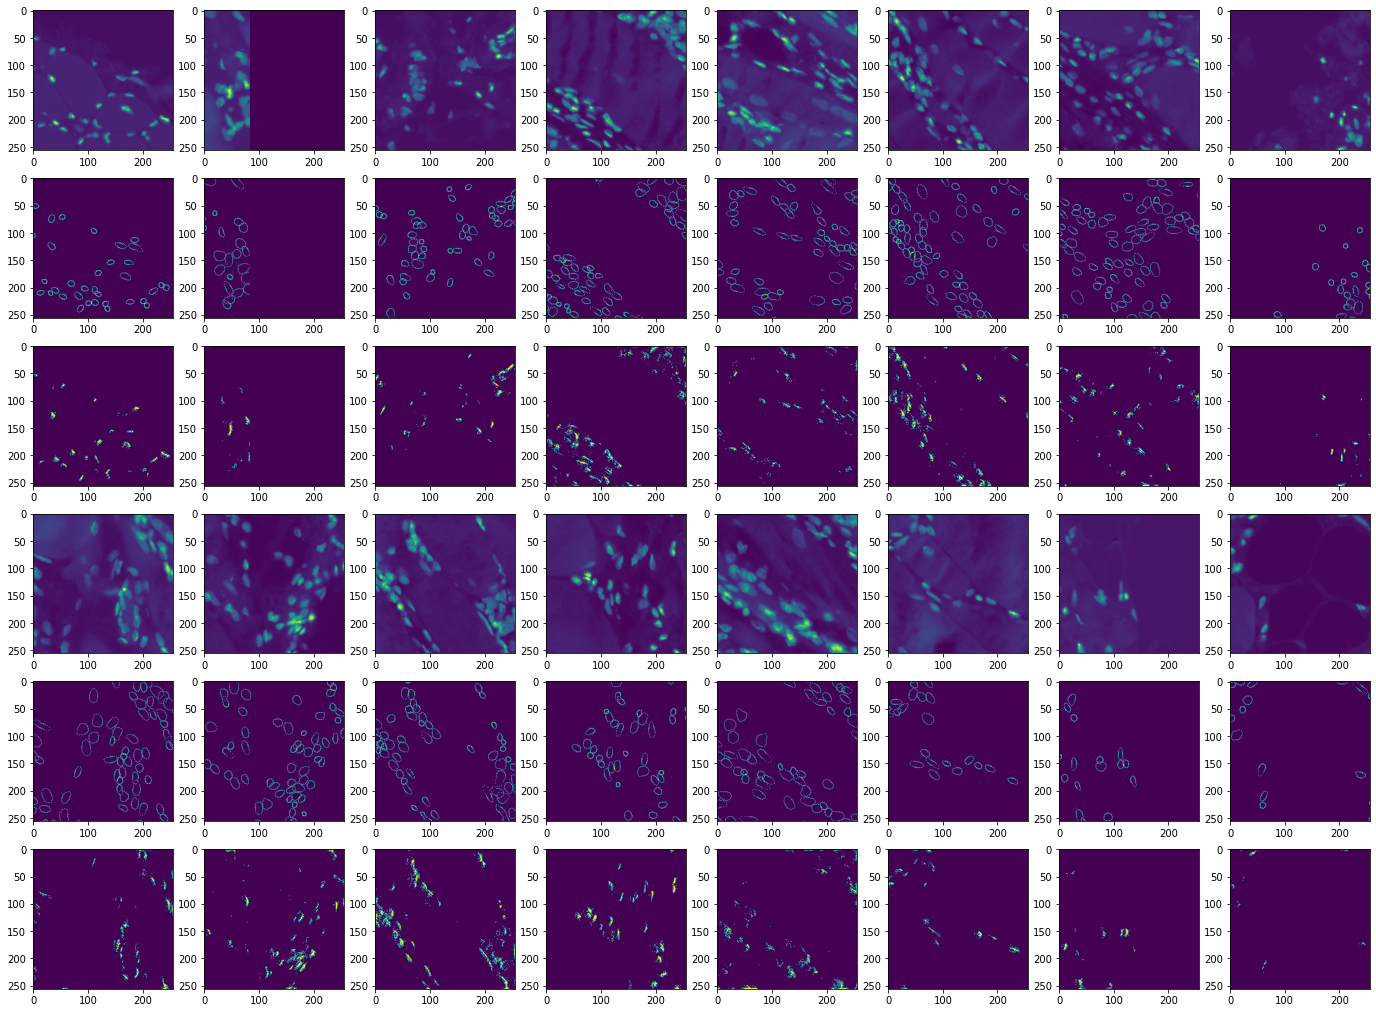

In [ ]:
input, target = next(iter(dataloader['validation']))
#output = nn.Sigmoid()(model.cpu()(input))
#output = (output > 0.5).float()
thres = 0.8
output = (model.cpu()(input)> thres) * 1

plt.figure(figsize=(24,18))
for _ in range(8):
  plt.subplot(6,8,_+1)
  plt.imshow(input[_].squeeze().numpy())
  plt.subplot(6,8,_+9)
  plt.imshow(target[_].squeeze().numpy())
  plt.subplot(6,8,_+17)
  plt.imshow(output[_].squeeze().numpy())
for _ in range(8,16):
  plt.subplot(6,8,_+17)
  plt.imshow(input[_].squeeze().numpy())
  plt.subplot(6,8,_+25)
  plt.imshow(target[_].squeeze().numpy())
  plt.subplot(6,8,_+33)
  plt.imshow(output[_].squeeze().numpy())
plt.show()

## Model using Tversky Loss visualization

In [ ]:
model_load = torch.load('/scratch/liy31/myjupyter/capstone/model/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(0.431, 0.994))

In [ ]:
model = model_load['model'].to(device)
model.eval()   # Set model to evaluate mode

running_pos_corrects = 0
running_neg_corrects = 0
running_pos = 0
running_neg = 0

# Iterate over data.
for inputs, target in dataloader['validation']:
    inputs = inputs.to(device)
    target = target.to(device)

    outputs = model(inputs)
    #pred = nn.Sigmoid()(outputs) > 0.5
    thres = 0.8
    pred = (outputs > thres) * 1
    # statistics
    running_pos += torch.sum(target)
    running_neg += torch.sum(~target.bool())
    running_pos_corrects += torch.sum(pred[target.bool()])
    running_neg_corrects += torch.sum(~target.bool()) - torch.sum(pred[~target.bool()])

epoch_pos_acc = running_pos_corrects.double() / running_pos.double()
epoch_neg_acc = running_neg_corrects.double() / running_neg.double()
epoch_acc = (epoch_pos_acc + epoch_neg_acc) / 2
print('Validation Boundary Acc: {:4f}, Background Acc: {:4f}, Overall Acc: {:4f}'.format(epoch_pos_acc, epoch_neg_acc, epoch_acc))

Validation Boundary Acc: 0.431232, Background Acc: 0.993932, Overall Acc: 0.712582


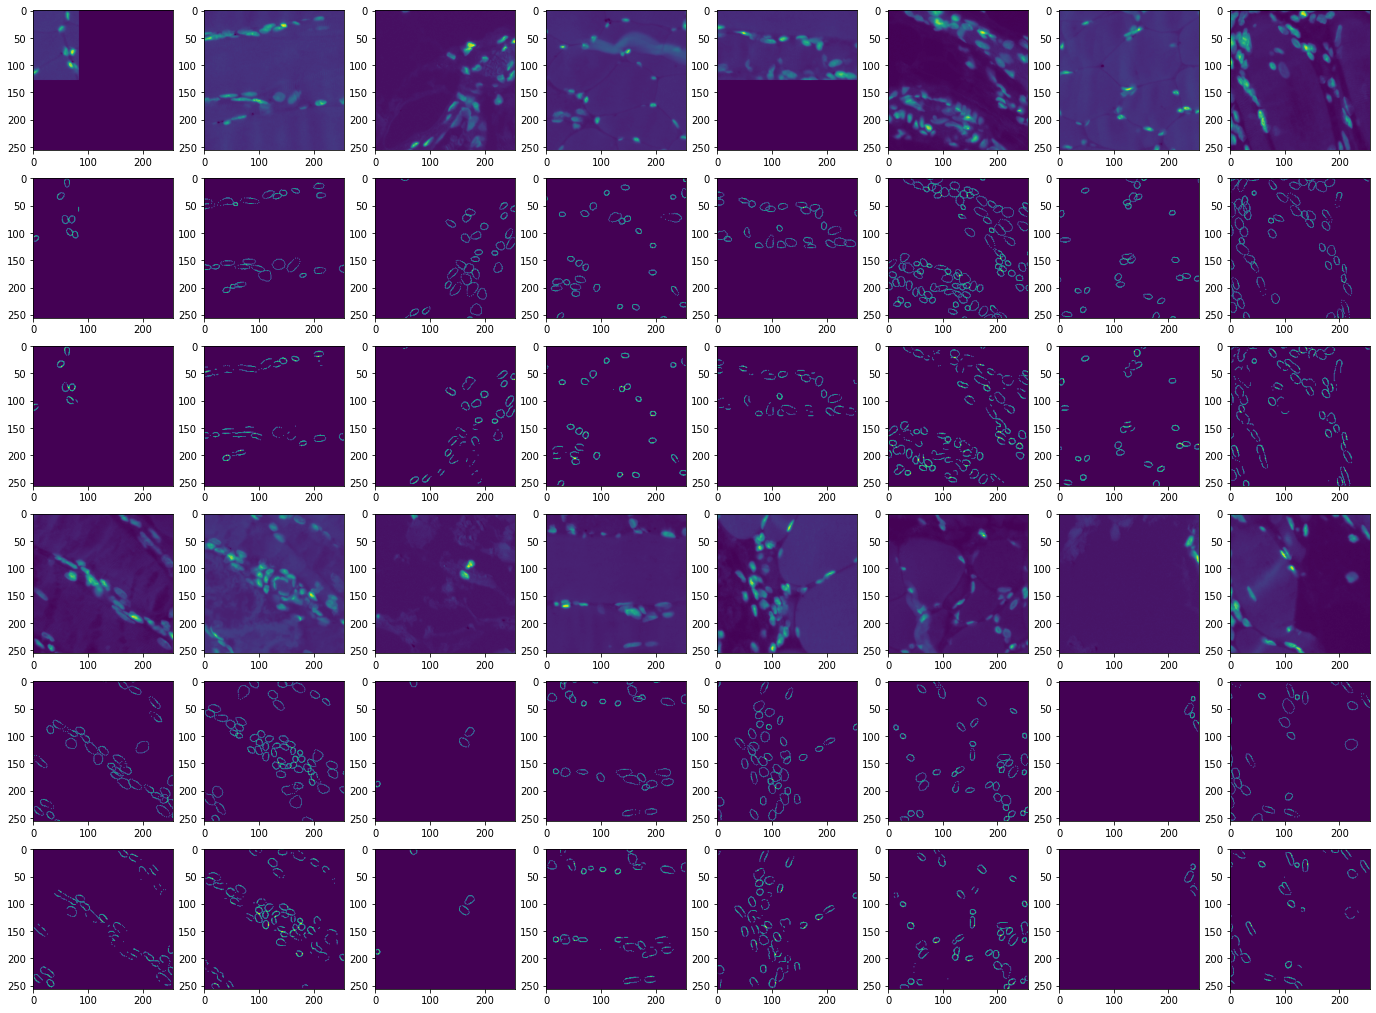

In [ ]:
input, target = next(iter(dataloader['validation']))
#output = nn.Sigmoid()(model.cpu()(input))
#output = (output > 0.5).float()
thres = 0.8
output = (model.cpu()(input)> thres) * 1

plt.figure(figsize=(24,18))
for _ in range(8):
  plt.subplot(6,8,_+1)
  plt.imshow(input[_].squeeze().numpy())
  plt.subplot(6,8,_+9)
  plt.imshow(target[_].squeeze().numpy())
  plt.subplot(6,8,_+17)
  plt.imshow(output[_].squeeze().numpy())
for _ in range(8,16):
  plt.subplot(6,8,_+17)
  plt.imshow(input[_].squeeze().numpy())
  plt.subplot(6,8,_+25)
  plt.imshow(target[_].squeeze().numpy())
  plt.subplot(6,8,_+33)
  plt.imshow(output[_].squeeze().numpy())
plt.show()

Visualization after tiling images

In [ ]:
model_load = torch.load('/scratch/liy31/myjupyter/capstone/model_tversky/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(0.349, 0.993))

/ext3/miniconda3/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/ext3/miniconda3/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/ext3/miniconda3/lib/python3.8/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's 

In [ ]:
model = model_load['model'].to(device)
model.eval()   # Set model to evaluate mode

running_pos_corrects = 0
running_neg_corrects = 0
running_pos = 0
running_neg = 0

# Iterate over data.
for inputs, target in dataloader['validation']:
    inputs = inputs.to(device)
    target = target.to(device)

    outputs = model(inputs)
    #pred = nn.Sigmoid()(outputs) > 0.5
    thres = 0.8
    pred = (outputs > thres) * 1
    # statistics
    running_pos += torch.sum(target)
    running_neg += torch.sum(~target.bool())
    running_pos_corrects += torch.sum(pred[target.bool()])
    running_neg_corrects += torch.sum(~target.bool()) - torch.sum(pred[~target.bool()])

epoch_pos_acc = running_pos_corrects.double() / running_pos.double()
epoch_neg_acc = running_neg_corrects.double() / running_neg.double()
epoch_acc = (epoch_pos_acc + epoch_neg_acc) / 2
print('Validation Boundary Acc: {:4f}, Background Acc: {:4f}, Overall Acc: {:4f}'.format(epoch_pos_acc, epoch_neg_acc, epoch_acc))

Validation Boundary Acc: 0.342704, Background Acc: 0.994537, Overall Acc: 0.668620


In [ ]:
input, target = next(iter(dataloader['validation']))
#output = nn.Sigmoid()(model.cpu()(input))
#output = (output > 0.5).float()
thres = 0.8
output = (model.cpu()(input)> thres) * 1

plt.figure(figsize=(24,18))
for _ in range(8):
    plt.subplot(6,8,_+1)
    plt.imshow(input[_].squeeze().numpy())
    plt.subplot(6,8,_+9)
    plt.imshow(target[_].squeeze().numpy())
    plt.subplot(6,8,_+17)
    plt.imshow(output[_].squeeze().numpy())
for _ in range(8,16):
    plt.subplot(6,8,_+17)
    plt.imshow(input[_].squeeze().numpy())
    plt.subplot(6,8,_+25)
    plt.imshow(target[_].squeeze().numpy())
    plt.subplot(6,8,_+33)
    plt.imshow(output[_].squeeze().numpy())
plt.show()

# BCELossWithLogits

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    init_model_wts = copy.deepcopy(model.state_dict())
    best_pos_model_wts = copy.deepcopy(model.state_dict())
    best_neg_model_wts = copy.deepcopy(model.state_dict())
    best_model_wts = copy.deepcopy(model.state_dict())
    best_pos_acc = 0.0
    best_neg_acc = 0.0
    best_acc = 0.0

    for epoch in tqdm(range(num_epochs)):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_pos_corrects = 0
            running_neg_corrects = 0
            running_pos = 0
            running_neg = 0

            # Iterate over data.
            for inputs, target in dataloader[phase]:
                inputs = inputs.to(device)
                target = target.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    pred = nn.Sigmoid()(outputs) > 0.5
                    loss = criterion(outputs, target)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item()
                running_pos += torch.sum(target)
                running_neg += torch.sum(~target.bool())
                running_pos_corrects += torch.sum(pred[target.bool()])
                running_neg_corrects += torch.sum(~target.bool()) - torch.sum(pred[~target.bool()])
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / datasize[phase]
            epoch_pos_acc = running_pos_corrects.double() / running_pos.double()
            epoch_neg_acc = running_neg_corrects.double() / running_neg.double()
            epoch_acc = (epoch_pos_acc + epoch_neg_acc) / 2

            print('{} Loss: {:.4f} Boundary Acc: {:.4f} Background Acc: {:.4f} Overall Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_pos_acc, epoch_neg_acc, epoch_acc))

            # deep copy the model
            if phase == 'validation':
                if epoch_pos_acc > best_pos_acc:
                    best_pos_acc = epoch_pos_acc
                    best_pos_model_wts = copy.deepcopy(model.state_dict())
                    torch.save({'model': model, 'optimizer': optimizer, 'scheduler': scheduler.state_dict(), 'loss': criterion.state_dict(), 
                                'epoch': epoch, 'initial_state': init_model_wts}, 
                               './Colton AI project/Myositis Images/model/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(epoch_pos_acc, epoch_neg_acc))
                if epoch_neg_acc > best_neg_acc:
                    best_neg_acc = epoch_neg_acc
                    best_neg_model_wts = copy.deepcopy(model.state_dict())
                    torch.save({'model': model, 'optimizer': optimizer, 'scheduler': scheduler.state_dict(), 'loss': criterion.state_dict(), 
                                'epoch': epoch, 'initial_state': init_model_wts}, 
                               './Colton AI project/Myositis Images/model/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(epoch_pos_acc, epoch_neg_acc))
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    torch.save({'model': model, 'optimizer': optimizer, 'scheduler': scheduler.state_dict(), 'loss': criterion.state_dict(), 
                                'epoch': epoch, 'initial_state': init_model_wts}, 
                               './Colton AI project/Myositis Images/model/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(epoch_pos_acc, epoch_neg_acc))

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best Boundary Acc: {:4f}, Best Background Acc: {:4f}, Best Overall Acc: {:4f}'.format(best_pos_acc, best_neg_acc, best_acc))

In [ ]:
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=1, out_channels=1, init_features=32, pretrained=False) # https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/
model = model.to(device)
criterion = nn.BCEWithLogitsLoss(reduction='sum', pos_weight=torch.tensor([40.]).to(device))
optimizer = optim.Adam(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

Using cache found in /home/fz477/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [ ]:
train_model(model, criterion, optimizer, scheduler)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 0/24
----------
train Loss: 63124.5480 Boundary Acc: 0.9513 Background Acc: 0.7896 Overall Acc: 0.8705
validation Loss: 61020.7381 Boundary Acc: 0.9746 Background Acc: 0.8475 Overall Acc: 0.9111


  4%|▍         | 1/25 [01:47<42:54, 107.28s/it]


Epoch 1/24
----------
train Loss: 62105.4687 Boundary Acc: 0.9633 Background Acc: 0.7956 Overall Acc: 0.8794
validation Loss: 60526.9931 Boundary Acc: 0.9751 Background Acc: 0.7391 Overall Acc: 0.8571


  8%|▊         | 2/25 [02:42<35:06, 91.60s/it] 


Epoch 2/24
----------
train Loss: 61047.5488 Boundary Acc: 0.9513 Background Acc: 0.7788 Overall Acc: 0.8650
validation Loss: 62727.8087 Boundary Acc: 0.9937 Background Acc: 0.5706 Overall Acc: 0.7822


 12%|█▏        | 3/25 [03:37<29:37, 80.81s/it]


Epoch 3/24
----------
train Loss: 60905.3772 Boundary Acc: 0.9543 Background Acc: 0.8601 Overall Acc: 0.9072


 16%|█▌        | 4/25 [04:35<25:49, 73.79s/it]

validation Loss: 59715.9443 Boundary Acc: 0.9793 Background Acc: 0.4792 Overall Acc: 0.7292

Epoch 4/24
----------
train Loss: 60716.4758 Boundary Acc: 0.9621 Background Acc: 0.8376 Overall Acc: 0.8999


 20%|██        | 5/25 [05:30<22:42, 68.10s/it]

validation Loss: 59672.5121 Boundary Acc: 0.9695 Background Acc: 0.7709 Overall Acc: 0.8702

Epoch 5/24
----------
train Loss: 60556.0503 Boundary Acc: 0.9675 Background Acc: 0.7958 Overall Acc: 0.8816
validation Loss: 59295.7098 Boundary Acc: 0.9814 Background Acc: 0.8694 Overall Acc: 0.9254


 24%|██▍       | 6/25 [06:25<20:19, 64.20s/it]


Epoch 6/24
----------
train Loss: 60522.4275 Boundary Acc: 0.9694 Background Acc: 0.8027 Overall Acc: 0.8861


 28%|██▊       | 7/25 [07:19<18:21, 61.20s/it]

validation Loss: 59220.0365 Boundary Acc: 0.9815 Background Acc: 0.8673 Overall Acc: 0.9244

Epoch 7/24
----------
train Loss: 60498.8167 Boundary Acc: 0.9698 Background Acc: 0.7875 Overall Acc: 0.8786


 32%|███▏      | 8/25 [08:13<16:45, 59.16s/it]

validation Loss: 59223.9707 Boundary Acc: 0.9812 Background Acc: 0.8041 Overall Acc: 0.8927

Epoch 8/24
----------
train Loss: 60477.2921 Boundary Acc: 0.9707 Background Acc: 0.8108 Overall Acc: 0.8908


 36%|███▌      | 9/25 [09:08<15:24, 57.77s/it]

validation Loss: 59316.2308 Boundary Acc: 0.9830 Background Acc: 0.8418 Overall Acc: 0.9124

Epoch 9/24
----------
train Loss: 60458.5920 Boundary Acc: 0.9708 Background Acc: 0.7988 Overall Acc: 0.8848


 40%|████      | 10/25 [10:02<14:11, 56.75s/it]

validation Loss: 59194.6626 Boundary Acc: 0.9828 Background Acc: 0.7969 Overall Acc: 0.8898

Epoch 10/24
----------
train Loss: 60421.8703 Boundary Acc: 0.9720 Background Acc: 0.8042 Overall Acc: 0.8881


 44%|████▍     | 11/25 [10:57<13:04, 56.06s/it]

validation Loss: 59180.3459 Boundary Acc: 0.9825 Background Acc: 0.8649 Overall Acc: 0.9237

Epoch 11/24
----------
train Loss: 60414.8825 Boundary Acc: 0.9724 Background Acc: 0.8073 Overall Acc: 0.8899


 48%|████▊     | 12/25 [11:51<12:03, 55.66s/it]

validation Loss: 59173.1608 Boundary Acc: 0.9828 Background Acc: 0.8397 Overall Acc: 0.9112

Epoch 12/24
----------
train Loss: 60411.9977 Boundary Acc: 0.9724 Background Acc: 0.8064 Overall Acc: 0.8894


 52%|█████▏    | 13/25 [12:46<11:03, 55.30s/it]

validation Loss: 59184.5428 Boundary Acc: 0.9838 Background Acc: 0.8522 Overall Acc: 0.9180

Epoch 13/24
----------
train Loss: 60411.5128 Boundary Acc: 0.9724 Background Acc: 0.8061 Overall Acc: 0.8893
validation Loss: 59168.9884 Boundary Acc: 0.9836 Background Acc: 0.8775 Overall Acc: 0.9305


 56%|█████▌    | 14/25 [13:41<10:08, 55.31s/it]


Epoch 14/24
----------
train Loss: 60404.0372 Boundary Acc: 0.9729 Background Acc: 0.8099 Overall Acc: 0.8914


 60%|██████    | 15/25 [14:35<09:09, 54.99s/it]

validation Loss: 59187.1109 Boundary Acc: 0.9840 Background Acc: 0.8575 Overall Acc: 0.9208

Epoch 15/24
----------
train Loss: 60399.0395 Boundary Acc: 0.9731 Background Acc: 0.8131 Overall Acc: 0.8931


 64%|██████▍   | 16/25 [15:30<08:12, 54.76s/it]

validation Loss: 59151.4675 Boundary Acc: 0.9837 Background Acc: 0.8754 Overall Acc: 0.9296

Epoch 16/24
----------
train Loss: 60399.4816 Boundary Acc: 0.9731 Background Acc: 0.8078 Overall Acc: 0.8904


 68%|██████▊   | 17/25 [16:24<07:17, 54.63s/it]

validation Loss: 59175.0680 Boundary Acc: 0.9832 Background Acc: 0.8049 Overall Acc: 0.8940

Epoch 17/24
----------
train Loss: 60399.2877 Boundary Acc: 0.9730 Background Acc: 0.8060 Overall Acc: 0.8895


 72%|███████▏  | 18/25 [17:19<06:22, 54.66s/it]

validation Loss: 59177.3897 Boundary Acc: 0.9833 Background Acc: 0.8056 Overall Acc: 0.8944

Epoch 18/24
----------
train Loss: 60399.2512 Boundary Acc: 0.9728 Background Acc: 0.8017 Overall Acc: 0.8873


 76%|███████▌  | 19/25 [18:15<05:29, 55.00s/it]

validation Loss: 59152.0437 Boundary Acc: 0.9832 Background Acc: 0.8271 Overall Acc: 0.9052

Epoch 19/24
----------
train Loss: 60399.2765 Boundary Acc: 0.9729 Background Acc: 0.8049 Overall Acc: 0.8889


 80%|████████  | 20/25 [19:08<04:33, 54.66s/it]

validation Loss: 59171.6292 Boundary Acc: 0.9841 Background Acc: 0.8606 Overall Acc: 0.9224

Epoch 20/24
----------
train Loss: 60395.9016 Boundary Acc: 0.9730 Background Acc: 0.8072 Overall Acc: 0.8901


 84%|████████▍ | 21/25 [20:02<03:37, 54.48s/it]

validation Loss: 59169.7290 Boundary Acc: 0.9833 Background Acc: 0.8501 Overall Acc: 0.9167

Epoch 21/24
----------
train Loss: 60398.6430 Boundary Acc: 0.9730 Background Acc: 0.8044 Overall Acc: 0.8887


 88%|████████▊ | 22/25 [20:57<02:43, 54.42s/it]

validation Loss: 59165.8225 Boundary Acc: 0.9831 Background Acc: 0.8028 Overall Acc: 0.8929

Epoch 22/24
----------
train Loss: 60396.5472 Boundary Acc: 0.9729 Background Acc: 0.8077 Overall Acc: 0.8903


 92%|█████████▏| 23/25 [21:54<01:50, 55.17s/it]

validation Loss: 59148.7921 Boundary Acc: 0.9832 Background Acc: 0.8446 Overall Acc: 0.9139

Epoch 23/24
----------
train Loss: 60399.1339 Boundary Acc: 0.9730 Background Acc: 0.8083 Overall Acc: 0.8906


 96%|█████████▌| 24/25 [22:49<00:55, 55.16s/it]

validation Loss: 59166.2071 Boundary Acc: 0.9829 Background Acc: 0.8001 Overall Acc: 0.8915

Epoch 24/24
----------
train Loss: 60397.7522 Boundary Acc: 0.9732 Background Acc: 0.8080 Overall Acc: 0.8906


100%|██████████| 25/25 [23:49<00:00, 57.18s/it]

validation Loss: 59158.2827 Boundary Acc: 0.9830 Background Acc: 0.8599 Overall Acc: 0.9214

Training complete in 23m 49s
Best Boundary Acc: 0.993684, Best Background Acc: 0.877492, Best Overall Acc: 0.930526


In [ ]:
model_load = torch.load('./Colton AI project/Myositis Images/model/unet_fa_{:.3f}_ba_{:.3f}.pt'.format(0.984, 0.877))

In [ ]:
model = model_load['model'].to(device)
model.eval()   # Set model to evaluate mode

running_pos_corrects = 0
running_neg_corrects = 0
running_pos = 0
running_neg = 0

# Iterate over data.
for inputs, target in dataloader['validation']:
    inputs = inputs.to(device)
    target = target.to(device)

    outputs = model(inputs)
    pred = nn.Sigmoid()(outputs) > 0.5

    # statistics
    running_pos += torch.sum(target)
    running_neg += torch.sum(~target.bool())
    running_pos_corrects += torch.sum(pred[target.bool()])
    running_neg_corrects += torch.sum(~target.bool()) - torch.sum(pred[~target.bool()])

epoch_pos_acc = running_pos_corrects.double() / running_pos.double()
epoch_neg_acc = running_neg_corrects.double() / running_neg.double()
epoch_acc = (epoch_pos_acc + epoch_neg_acc) / 2
print('Validation Boundary Acc: {:4f}, Background Acc: {:4f}, Overall Acc: {:4f}'.format(epoch_pos_acc, epoch_neg_acc, epoch_acc))

Validation Boundary Acc: 0.983560, Background Acc: 0.877492, Overall Acc: 0.930526


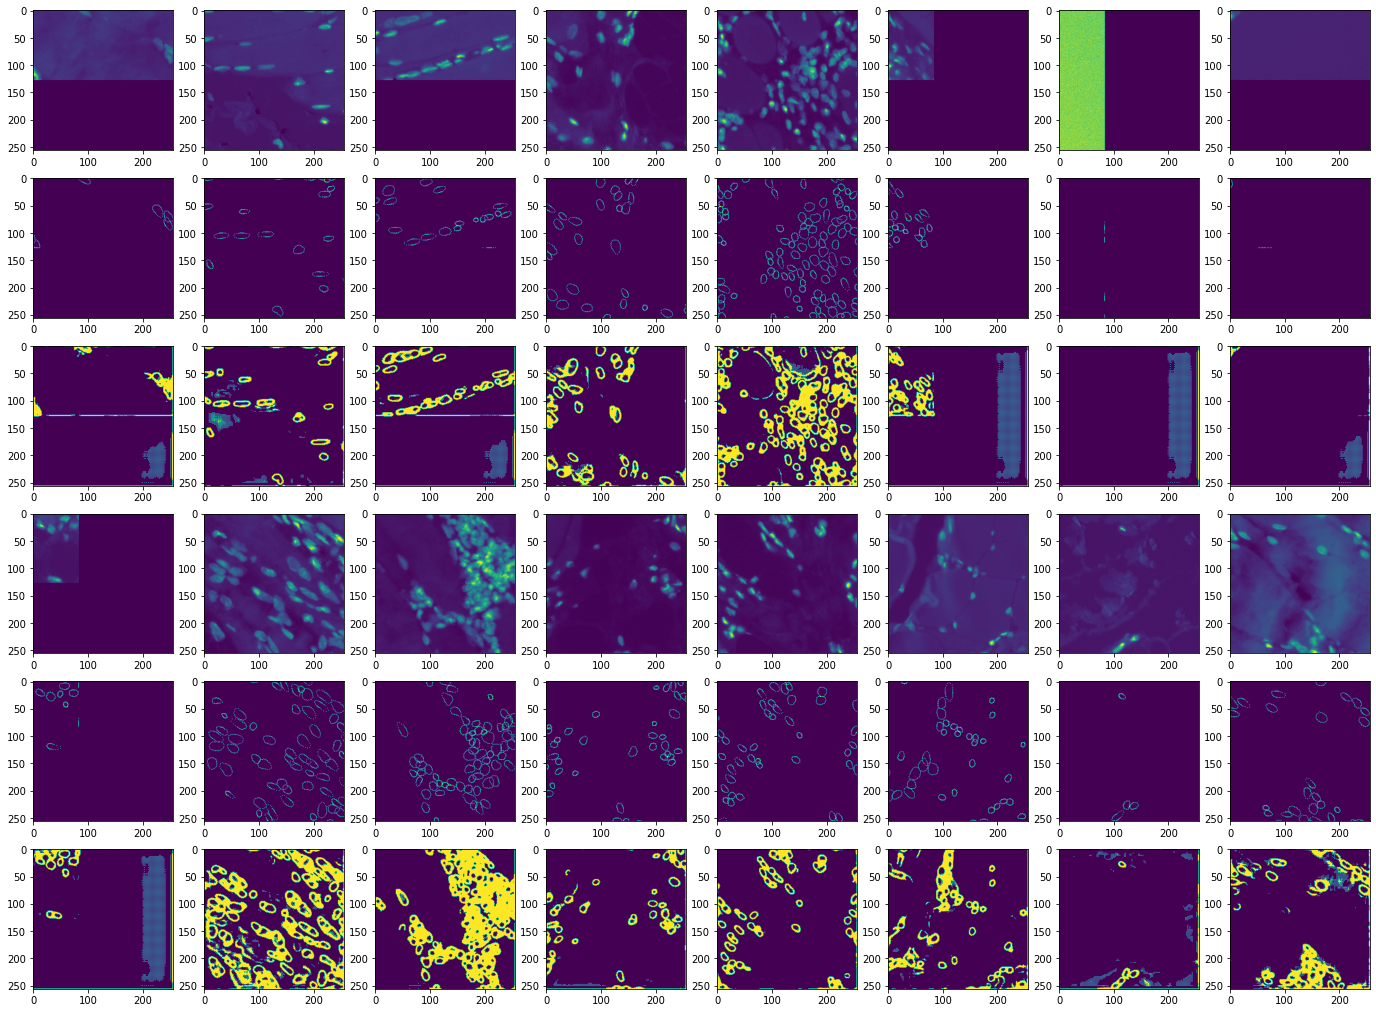

In [ ]:
input, target = next(iter(dataloader['validation']))
output = nn.Sigmoid()(model.cpu()(input))
output = (output > 0.5).float()

plt.figure(figsize=(24,18))
for _ in range(8):
  plt.subplot(6,8,_+1)
  plt.imshow(input[_].squeeze().numpy())
  plt.subplot(6,8,_+9)
  plt.imshow(target[_].squeeze().numpy())
  plt.subplot(6,8,_+17)
  plt.imshow(output[_].squeeze().numpy())
for _ in range(8,16):
  plt.subplot(6,8,_+17)
  plt.imshow(input[_].squeeze().numpy())
  plt.subplot(6,8,_+25)
  plt.imshow(target[_].squeeze().numpy())
  plt.subplot(6,8,_+33)
  plt.imshow(output[_].squeeze().numpy())
plt.show()

In [ ]:
model = model_load['model'].to(device)
model.eval()   # Set model to evaluate mode

running_pos_corrects = 0
running_neg_corrects = 0
running_pos = 0
running_neg = 0

# Iterate over data.
for inputs, target in dataloader['test']:
    inputs = inputs.to(device)
    target = target.to(device)

    outputs = model(inputs)
    pred = nn.Sigmoid()(outputs) > 0.5

    # statistics
    running_pos += torch.sum(target)
    running_neg += torch.sum(~target.bool())
    running_pos_corrects += torch.sum(pred[target.bool()])
    running_neg_corrects += torch.sum(~target.bool()) - torch.sum(pred[~target.bool()])

epoch_pos_acc = running_pos_corrects.double() / running_pos.double()
epoch_neg_acc = running_neg_corrects.double() / running_neg.double()
epoch_acc = (epoch_pos_acc + epoch_neg_acc) / 2
print('Test Boundary Acc: {:4f}, Background Acc: {:4f}, Overall Acc: {:4f}'.format(epoch_pos_acc, epoch_neg_acc, epoch_acc))

Test Boundary Acc: 0.974566, Background Acc: 0.914604, Overall Acc: 0.944585


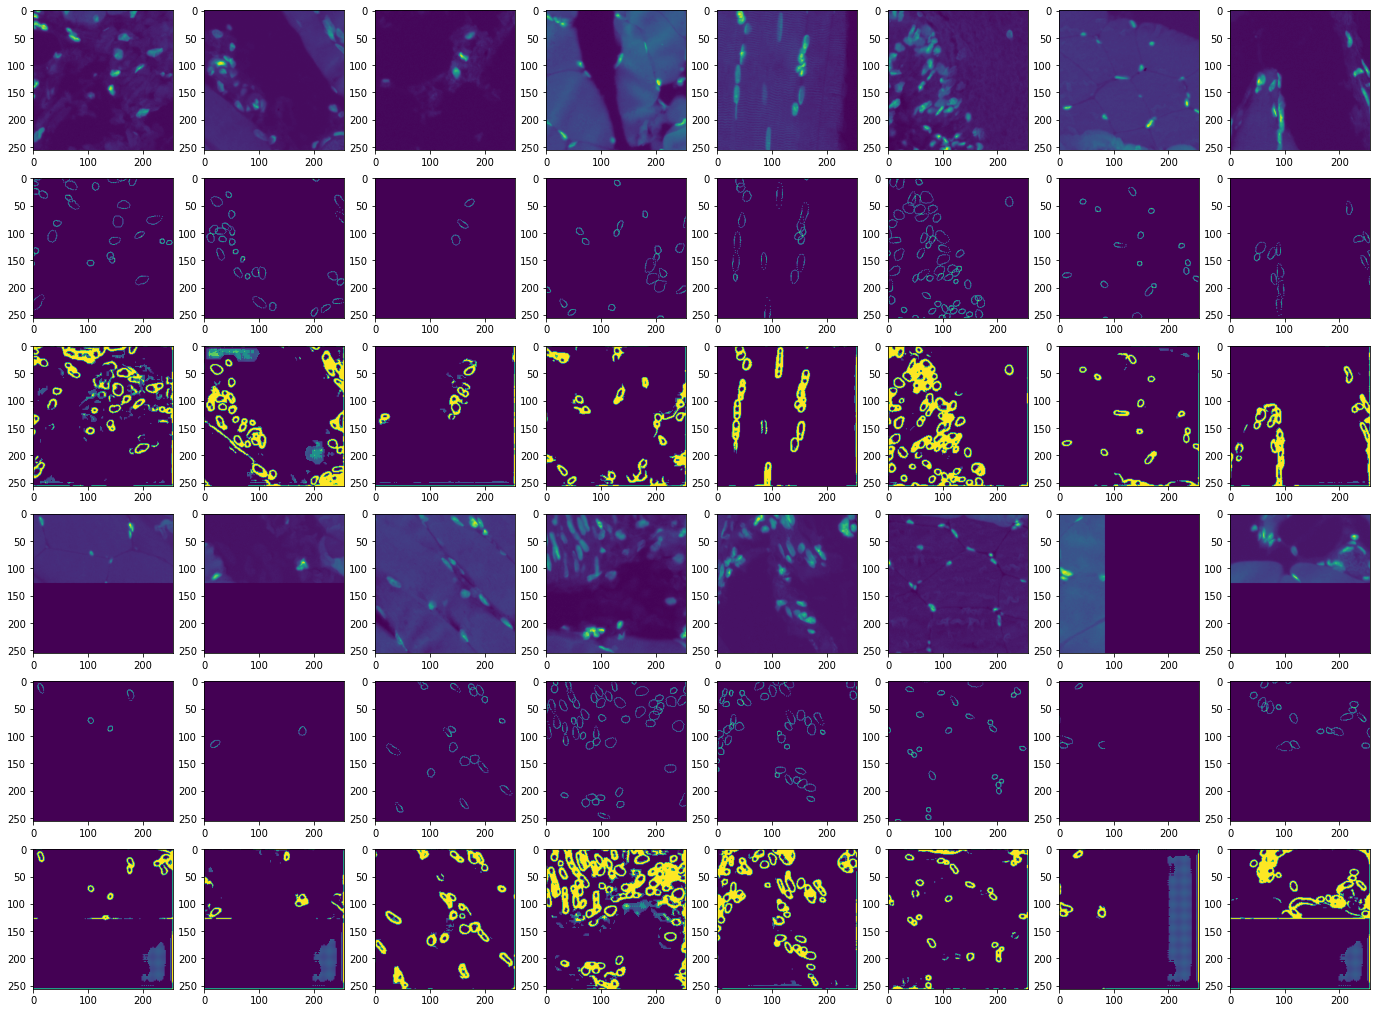

In [ ]:
input, target = next(iter(dataloader['test']))
output = nn.Sigmoid()(model.cpu()(input))
output = (output > 0.5).float()

plt.figure(figsize=(24,18))
for _ in range(8):
  plt.subplot(6,8,_+1)
  plt.imshow(input[_].squeeze().numpy())
  plt.subplot(6,8,_+9)
  plt.imshow(target[_].squeeze().numpy())
  plt.subplot(6,8,_+17)
  plt.imshow(output[_].squeeze().numpy())
for _ in range(8,16):
  plt.subplot(6,8,_+17)
  plt.imshow(input[_].squeeze().numpy())
  plt.subplot(6,8,_+25)
  plt.imshow(target[_].squeeze().numpy())
  plt.subplot(6,8,_+33)
  plt.imshow(output[_].squeeze().numpy())
plt.show()

## BCE+DICE loss with data augmentaion